# Import relevant packages and prepare the data

In [28]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import layers, models
import seaborn as sns
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

# Set the theme for seaborn plots
sns.set_theme()

In [29]:
# Load the MNIST dataset, which contains handwritten digits.
mnist = tf.keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [30]:
# Display the number of training and test samples
print(f"Number of training samples: {len(x_train)}")
print(f"Number of test samples: {len(x_test)}")

Number of training samples: 60000
Number of test samples: 10000


In the dataset, 6/7 of the data is allocated for training, which is approximately 85.7%.

In [31]:
# Normalize pixel values to be between 0 and 1
x_train, x_test = x_train / 255.0, x_test / 255.0

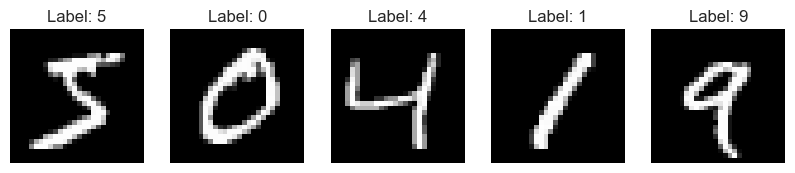

In [32]:
# Visualize a few examples from the training set
num_images = 5
plt.figure(figsize=(10, 2))
for i in range(num_images):
    plt.subplot(1, num_images, i + 1)
    plt.imshow(x_train[i], cmap='gray')
    plt.title(f"Label: {y_train[i]}")
    plt.axis('off')
plt.show()

Display distribution of digits

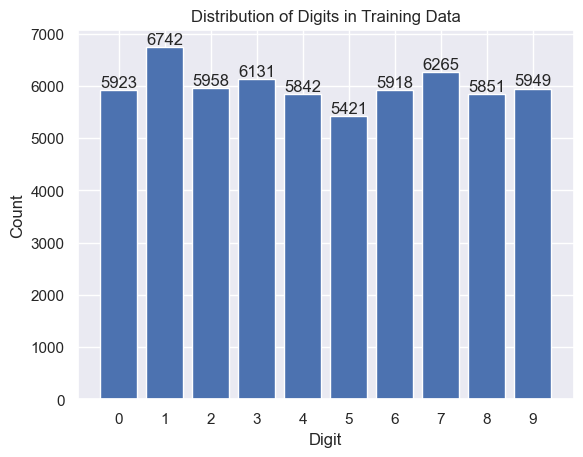

In [33]:
# Labels in the dataset range from 0 to 9
unique, counts = np.unique(y_train, return_counts=True)

plt.bar(unique, counts, tick_label=unique)
plt.xlabel('Digit')
plt.ylabel('Count')
plt.title('Distribution of Digits in Training Data')

# Annotate bars with counts
for i in range(len(unique)):
    plt.text(unique[i], counts[i], str(counts[i]), ha='center', va='bottom')

plt.show()

Next, we will construct our neural network model using a set of predefined hyperparameters. Future work may involve tuning these hyperparameters to optimize model performance further.

# Build and compile the model

In [34]:
# Define a Sequential model with several layers
model = models.Sequential([
    layers.Flatten(input_shape=(28, 28)),  # Flatten the 28x28 images into 1D vectors
    layers.Dense(128, activation='relu'),   # Dense layer with ReLU activation
    layers.Dense(64, activation='relu'),    # Another Dense layer with ReLU activation
    layers.Dropout(0.2),                   # Dropout layer to prevent overfitting
    layers.Dense(10, activation='softmax')  # Output layer with softmax activation for classification
])

# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [35]:
# Create an EarlyStopping callback to stop training when validation loss does not improve
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=3)

In [36]:
# Train the model with training data, validation split, and early stopping callback
history = model.fit(x_train, y_train, epochs=20, validation_split=0.1, callbacks=[early_stopping])

Epoch 1/20
1688/1688 [==============================] - 4s 2ms/step - loss: 0.3042 - accuracy: 0.9094 - val_loss: 0.1148 - val_accuracy: 0.9633
Epoch 2/20
1688/1688 [==============================] - 3s 2ms/step - loss: 0.1315 - accuracy: 0.9612 - val_loss: 0.0916 - val_accuracy: 0.9730
Epoch 3/20
1688/1688 [==============================] - 3s 2ms/step - loss: 0.0931 - accuracy: 0.9711 - val_loss: 0.0717 - val_accuracy: 0.9782
Epoch 4/20
1688/1688 [==============================] - 3s 2ms/step - loss: 0.0721 - accuracy: 0.9774 - val_loss: 0.0680 - val_accuracy: 0.9785
Epoch 5/20
1688/1688 [==============================] - 3s 2ms/step - loss: 0.0595 - accuracy: 0.9815 - val_loss: 0.0797 - val_accuracy: 0.9775
Epoch 6/20
1688/1688 [==============================] - 3s 2ms/step - loss: 0.0489 - accuracy: 0.9842 - val_loss: 0.0748 - val_accuracy: 0.9792
Epoch 7/20
1688/1688 [==============================] - 3s 2ms/step - loss: 0.0420 - accuracy: 0.9864 - val_loss: 0.0749 - val_accuracy:

#### Visualize training progress

In [37]:
history_dict = history.history

# Extract metrics from the training history
accuracy = history_dict['accuracy']
val_accuracy = history_dict['val_accuracy']
loss = history_dict['loss']
val_loss = history_dict['val_loss']

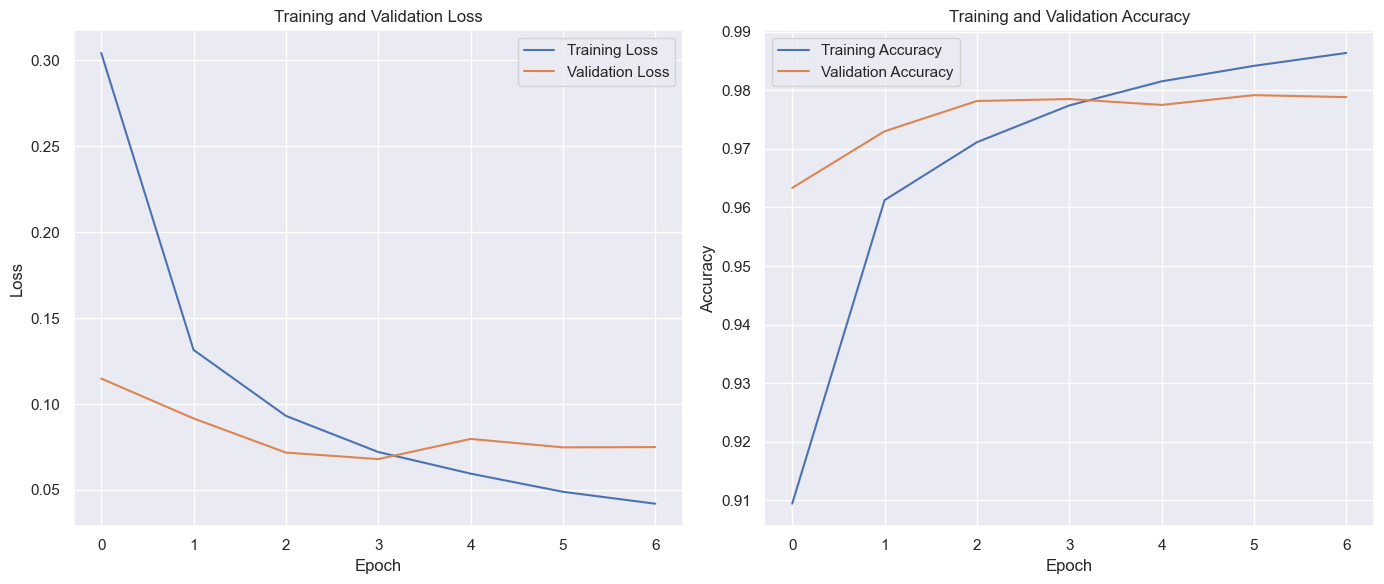

In [38]:
plt.figure(figsize=(14, 6))

# Plot for Loss
plt.subplot(1, 2, 1)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.grid(True)

# Plot for Accuracy
plt.subplot(1, 2, 2)
plt.plot(accuracy, label='Training Accuracy')
plt.plot(val_accuracy, label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()
plt.grid(True)

# Adjust layout
plt.tight_layout()
plt.show()

#### Evaluate the model

In [39]:
test_loss, test_acc = model.evaluate(x_test, y_test)
print('\nTest accuracy:', test_acc)

313/313 [==============================] - 0s 1ms/step - loss: 0.0803 - accuracy: 0.9786

Test accuracy: 0.978600025177002


The model achieved an accuracy of approximately 97.9% on the test set! This is a remarkable result for a relatively simple neural network with two hidden layers, demonstrating strong performance on the MNIST dataset.

# Analyze Model Predictions

313/313 [==============================] - 0s 991us/step


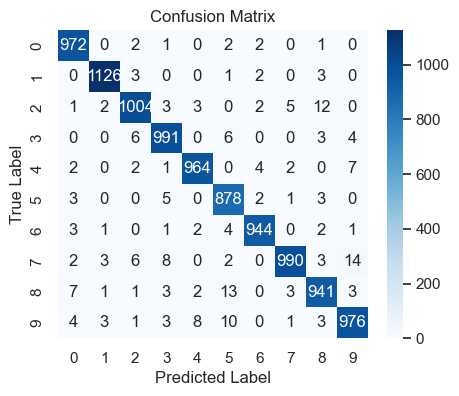

In [40]:
# Make predictions on the test set
y_pred = np.argmax(model.predict(x_test), axis=-1)

# Compute and display the confusion matrix
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(5, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=range(10), yticklabels=range(10))
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

In [41]:
# Print classification report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.98      0.99      0.98       980
           1       0.99      0.99      0.99      1135
           2       0.98      0.97      0.98      1032
           3       0.98      0.98      0.98      1010
           4       0.98      0.98      0.98       982
           5       0.96      0.98      0.97       892
           6       0.99      0.99      0.99       958
           7       0.99      0.96      0.98      1028
           8       0.97      0.97      0.97       974
           9       0.97      0.97      0.97      1009

    accuracy                           0.98     10000
   macro avg       0.98      0.98      0.98     10000
weighted avg       0.98      0.98      0.98     10000
